## **Contexte initial :**

Afin de réduire la consommation d'énergie et les émissions de gaz à effet de serre, l'ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.
Dans l'optique de répondre à cet appel, notre structure CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison.
L'objectif de cette étude est de calculer, sur un réseau routier, des tournées de camions permettant de relier des sous-ensembles de villes entre elles, puis de revenir au point de départ.
Ces tournées doivent être organisées de tel sorte que la date de retour du dernier camion à la base soit la plus proche possible de la date de départ afin de satisfaire les attentes de l'ADEME.


## **Versions du projet :**

### Les versions :

Notre projet a pour but de mener à bien notre étude.
Le projet est composé de 2 versions :

   - La versions de base :    
       - Le choix du modèle et le code en Python capable de résoudre des instances de taille importante (plusieurs milliers de villes). Cette résolution est sensée donner la tournée la plus courte possible passant par chaque ville.    
       - Une étude statistique du comportement expérimental de l'algorithme

   - La version évoluée :    
       - La version de base avec la prise en compte d'une ou plusieurs contraintes 


### Les contraintes du projet :

   - Fenêtre de temps de livraison pour chaque objet    
       - Interdiction de livrer hors de la fenêtre    
       - Possibilité d'attendre sur place l'ouverture de la fenêtre temporelle

   - Un nombre k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimiser non plus le temps total, mais la date de retour du dernier camion à la base.    
       - Capacité des camions (2 ou 3 dimensions) et encombrement des objets   
       - Certains objets ne peuvent être livrés que par certains camions

   - Chaque objet a un point de collecte spécifique

   - Le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la variation du trafic



## **Modélisation :**

Afin de modéliser notre cas d’étude, nous devons être capable de représenter les villes, les chemins entre les villes et le temps nécessaire pour aller d’une ville à une autre. 
Le graphe est donc l’outil le plus adapté dans notre cas, il est noté G et défini par le couple $G=(V, E)$.      
   - V  est un ensemble de sommets. Chaque sommet représente une ville et chaque ville est numérotée par un un entier naturels non nul ($\mathbb{N}$*).    
   - E  est un ensemble d’arrêtes. Une arrête correspond à une paire de sommets et indique donc qu’ils sont reliés. Dans notre cas, une arrête indique donc que deux villes sont relié par une route carrossable par un camion.
   - La pondération sur les arrêtes correspond au temps nécessaire pour aller d’une ville à un autre.

Afin de construire notre modèle, nous devons déterminer les 3 composantes suivantes :    
   - Les variables : elles représentent les composantes du modèle qui peuvent être modifiées pour créer des configurations différentes.    
   - La fonction objectif : cette fonction assigne une valeur à chaque configuration différente. Le terme “objectif” vient du fait que l’objectif est d’optimiser cette fonction. Dans notre cas, nous voulons la minimiser.
   - Les contraintes : elles représentent les limitations sur les variables.

### Les variables :

L’étape la plus importante dans la construction d’un modèle est le choix des variables que nous allons utiliser. En effet, un mauvais choix de variable peut rendre le problème impossible à résoudre. 
Nous avons donc un ensemble $C={1, …, n_c}$ de villes qui doivent obtenir une livraison de marchandise provenant du dépôt. Nous considérons qu'une ville correspond au dépôt $a$ qui appartient donc à l'ensemble $C$, noté mathématiquement par $a \in C$. 
Une demande de produit $d_i$ est associée à chaque ville $i$ appartenant à $C$.
Une flotte de véhicules $V={1, …, n_v }$ est disponible au dépôt et chaque véhicule possède la même capacité (flotte homogène) $Q$  tel que $Q≥max⁡(d_i ), ∀i ∈ N .$
Pour toutes villes $i$  et $j , ∀i,j ∈ C$ , nous connaissons le coût $c_{i,j}$ de transport direct entre $i$  et $j$. 
Pour trouver l’ordre de visite des villes, nous définissons la variable de décision $x{_i^v},_j$.    
$x{_i^v},_j$ vaut $1$ si le véhicule $v ∈ V$ visite la ville $j$ après la ville $i ,$ $ou$ $0$ sinon. 

### La fonction objectif :
Pour rappel, nous devons définir les trajets de livraisons de tel sorte à minimiser la date de retour du dernier camion au point de départ (dépôt).
En définissant $y_i$ comme étant la charge résiduelle du véhicule après avoir desservi la ville $i \in C$ , il nous est possible d’écrire la fonction objectif : 

$$
    Min(\sum_{v=1}^{n_v} \sum_{i=1}^{n_c} \sum_{j=1}^{n_c} c_i, _j x^v_i, _j)  
$$


### Les contraintes :

#### Voici la liste de toutes les contraintes qui s’appliquent sur notre problème :


Cette équation assure qu’on part une et une seule fois de chaque ville, avec un seul véhicule.

$$
    \sum_{v∈V}\sum_{j∈C}x_{i,j}^{v} = 1, ∀i ∈ C
$$

Cette équation assure que le véhicule qui arrive chez une ville est le même que celui qui part de cette ville.

$$
    \sum_{j∈C}x_{i,j}^{v}-\sum_{j∈C}x_{j,i}^{v} = 0,  ∀i ∈ C, v ∈ V
$$

Cette équation assure que chaque véhicule ne sort qu’une seule fois du dépôt.

$$
     \sum_{j∈C}x_{0,j}^{v} =  1, ∀v ∈ V
$$

Cette équation assure le retour unique au dépôt pour chaque véhicule (ou tournée).

$$
    \sum_{j∈C}x_{j,n+1}^{v} =  1, ∀v ∈ V
$$

Ces équation définissent les contraintes de capacité et d’intégrité.

$$
    x_{i,j}^{v} = 1 ⇒ y_i - d_j = y_i, ∀i, j ∈ C, v ∈ V
$$

$$
    x_{i,j}^{v} ∈ \{0, 1\} , ∀i, j ∈ C, v ∈ V
$$

Ces équations sont des fonctions de mesure qui permettent respectivement de
quantifier la solution selon la distance totale parcourue.

La fonction de coût euclidien de la solution $ X = (x_{i,j}^{v}), ∀i, j ∈ C, ∀v ∈ V$ est définie par :

$$
    coût(X)=\sum_{v=1}^{n_v} \sum_{i=1}^{n_c} \sum_{j=1}^{n_c} c_i, _j x^v_i, _j
$$

## **Compléxité :**

Pour étudier la complexité de notre problème, nous allons le comparer à un autre problème connu afin de prouver qu’il est NP-difficile mais pas NP-complet. 
Pour ce faire, nous allons le comparé au problème du voyageur de commerce.
Nous partons du principe que nous voulons prouver que notre problème est NP-complet. Pour prouver que le problème de notre projet est NP-complet, nous devons démontrer deux choses : d'abord, qu'il est dans la classe NP (c'est-à-dire qu'une solution proposée peut être vérifiée en temps polynomial), et ensuite, qu'il est NP-difficile (c'est-à-dire qu'il est au moins aussi difficile que n'importe quel autre problème NP).

### 1 Prouver que notre problème est dans la classe NP : 

Pour montrer que notre problème est dans la classe NP, nous devons fournir un certificat ou une preuve vérifiable en temps polynomial pour une solution proposée. Dans le cas de notre problème, un certificat serait n séries de listes, chacune correspondant à la route empruntée par chaque camion. n étant le nombre de camions ayant effectué les tournées.
Nous fournirions également une instance du problème comprenant un graphe représentant les emplacements à visiter, les capacités des véhicules et les demandes des villes.
Nous cherchons donc à savoir, à l’aide d’un algorithme, si le certificat donné est bel et bien la solution optimale à notre problème, c’est-à-dire, que la différence de temps entre le moment où tous les camions ont quitté le dépôt (en même temps) et le moment où le dernier camion revient est la plus petite. 
Pour vérifier cela, nous devons donc être en capacité de tester toutes les combinaisons possibles sur l’instance afin de savoir quelle est la solution optimale et donc savoir si le certificat correspond à la solution optimale.
Cependant, l’algorithme de recherche de toutes les combinaisons possibles possède une complexité asymptotique bien supérieure à une complexité asymptotique polynomiale.
Il est donc impossible de vérifier un certificat en un temps polynomial, il n’est donc pas NP.

### 2 Prouver que notre problème est dans NP-difficile :

Afin de prouver que notre problème est dans NP-difficile, nous devons faire une réduction polynomiale d’un problème connu comme NP-difficile vers notre problème.
Le problème que nous avons choisi pour effectuer cette réduction polynomiale est le problème du voyageur du commerce (TSP) puisqu’il s’apparente beaucoup à notre problème dans le cas où nous avons un camion pour effectuer la tournée complète de toutes les villes.
Pour réduire le TSP à notre problème, nous pouvons construire une instance de notre problème avec un seul camion et une contrainte de capacité du camion égale au nombre de villes qu’il doit livrer. Nous fixons la capacité de chaque ville à 1, c’est-à-dire qu’à chaque ville visitée, notre camion se vide d'une unité. De plus, La distance entre deux villes dans notre problème correspond à la distance entre ces mêmes villes dans le TSP.

#### Voici l’algorithme permettant de transformer une instance de TSP à notre problème :

    Instance_TSP = matrice du graphe pondéré de TSP

    Nombre_De_Camions = 1

    Capacite_Camions = Nombre_Villes_Dans_Instance_TSP

    Capacite_Villes = [] (tableau vide)

    Pour i allant de 0 à Nombre_Villes_Dans_Instance_TSP :

        Rajouter une valeur dans Capacite_Villes égale à 1


A l’aide de cet algorithme, nous somme capable de transformer une instance du TSP en une instance du problème de notre problème.
Si nous trouvons une solution avec l'instance de notre problème construite dans cette réduction, cela implique que le véhicule peut visiter toutes les villes exactement une fois, satisfaisant ainsi l'exigence du TSP. De plus, la distance totale parcourue par le véhicule dans notre problème sera identique à la longueur du parcours du TSP. Ainsi, résoudre l'instance de notre problème résout également l'instance du TSP. 
Puisque le TSP est NP-complet, donc NP-difficile et que nous avons démontré une réduction polynomiale du TSP vers notre problème, nous pouvons conclure que le problème de notre projet est au moins aussi difficile que le TSP et donc, par conséquent, NP-difficile.

Nous pouvons donc finalement conclure en disant que nous avons prouver que notre problème est NP-diffcile mais pas NP. Il n’est donc pas NP-complet. Cependant, le fait que notre problème soit NP-difficile signifie que notre problème est extrêmement difficile à résoudre de manière exacte, car il nécessite généralement une exploration exhaustive de toutes les possibilités, ce qui peut prendre un temps exponentiel ou factoriel en fonction de la taille de l'instance du problème. Nous devrons donc utiliser des algorithmes permettant de trouver des solutions à notre problème en se rapprochant autant que possible de l’optimum, tout en pouvant être résolu en un temps acceptable.


## Algorithme génétique

Les algorithmes génétiques sont des techniques de recherche stochastiques (par l'effet du hasard), inspirées par l’évolution biologique des espèces.

Dans notre cas, l'algorithme génétique est une méta-heuristique bien adapté à notre problème car il permet d'explorer efficacement un grand espace de recherche pour trouver des solutions potentiellement optimales. Pour notre problème, il peut y avoir un grand nombre de combinaisons possibles de routes, l'algorithme génétique permet donc de rechercher rapidement des solutions potentiellement proche de la solution optimale.

Un algorithme génétique consiste à faire évoluer progressivement, par générations successives, la composition de cette population, en maintenant sa taille constante : d’une génération à la suivante. Plus on avance dans les générations, plus on est sensé améliorer la fonction objectif de notre problème. Un tel résultat est obtenu en mimant les deux principaux mécanismes qui régissent l’évolution des êtres vivants : la sélection naturelle (qui détermine quels membres d’une population survivent et se reproduisent) et la reproduction (qui assure le brassage et la recombinaison des gènes parentaux, pour former des descendants aux potentialités nouvelles).<br />
Une génération est composée de $n$ individus

Dans notre cas, un individu correspond aux chemins empruntés par les k camions.<br />
Par exemple, si nous avons 3 camions qui livrent tous les client, l'individu sera décrit par les 3 chemins correspondant aux chemins des 3 camions.

### Génération de la matrice
Tout d'abord, nous devons générer une matrice connexe pondérée quelconque sur laquelle nous executerons notre algorithme génétique afin de trouver une solution convenable. Pour rappel, notre objectif est de faire en sorte que minimiser la date de retour du dernier camion au dépôt.
Le nombre de villes de la matrice correspond à la variable $\textit{num_villes}$.
Voici le code permettant de générer la matrice:

In [ ]:
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import heapq

num_villes = 400

def generate_weighted_adjacency_matrix(n):
    # Générer une matrice d'adjacence vide
    adjacency_matrix = [[0] * n for _ in range(n)]

    # Générer des liens aléatoires
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.random() < 0.6:  # Probabilité de lien entre deux villes
                weight = np.random.randint(1, 1000)  # Poids du lien entre deux villes
                adjacency_matrix[i][j] = weight 
                adjacency_matrix[j][i] = weight
                

    return adjacency_matrix

adj_matrix = generate_weighted_adjacency_matrix(num_villes)
print("finished")

### Algorithme de Dijkstra
Avant de continuer plus loin dans l'implémentation de l'algorithme génétique, nous implémentons l'algorithme de Dijkstra. Cet algorithme permet de trouver le plus court chemin entre deux point dans un graphe connexe quelconque.<br />
Il nous permettra de faire en sorte que nos camions reviennent au dépôt lors de la génération de solutions initiales et de réparer les chemins obtenus d'une génération à une autre.

In [ ]:
def dijkstra(adj_matrix, start_city, end_city):
    num_cities = len(adj_matrix)
    distances = [sys.maxsize] * num_cities
    visited = [False] * num_cities
    previous = [None] * num_cities

    distances[start_city] = 0

    for _ in range(num_cities):
        min_dist = sys.maxsize
        current_city = None

        for city in range(num_cities):
            if not visited[city] and distances[city] < min_dist:
                min_dist = distances[city]
                current_city = city

        visited[current_city] = True

        if current_city == end_city:
            break

        for neighbor in range(num_cities):
            if (
                not visited[neighbor]
                and adj_matrix[current_city][neighbor] != 0
                and distances[current_city] + adj_matrix[current_city][neighbor] < distances[neighbor]
            ):
                distances[neighbor] = distances[current_city] + adj_matrix[current_city][neighbor]
                previous[neighbor] = current_city

    if distances[end_city] == sys.maxsize:
        return "No path found."

    path = []
    current_city = end_city
    while current_city is not None:
        path.append(current_city)
        current_city = previous[current_city]

    path.reverse()
    return path, distances[end_city]

### Solutions initiales

Afin d'utiliser l'algorithme génétique, nous devons générer des solutions correctes intiales. En effet, l'objectif est de partir de solutions initiales correctes, d'y appliquer des opérateur algorithmiques (Sélection, Croisement, Mutation) dans le but de trouver une solution convenable, c'est-à-dire, assez proche de la solution optimale de tel sorte qu'on puisse la considérer comme optimale et donc viable. 
Le script ci-dessous permet de générer $\textit{numValidSol}$ solutions valides (individus) en fonction d'un nombre $\textit{NumTruck}$ de camions.

Le script fonctionne de telle sorte : 
 - A chaque ville, on regarde si il y a des villes valides encore non visitées. S'il y a des villes non visitées, on en choisit une au hasard parmit les villes non visitées et on s'y rend. Si toutes les villes voisines sont visitées, on en choisit une au hasard et on s'y rend dans le but de se rendre aux villes non visitées.

 - Une fois que toutes les villes ont été visités on utilise l'algorithme de Dijkstra pour que les camions reviennent au dépot avec le chemin le plus court possible.

Pour chaque individu, on effectue ce script. La grande part d'aléatoire permet de générer des solutions variées et donc permet d'éviter de se bloquer dès le début dans un optimum local. 

In [ ]:
NumTruck = 3

population = []
truckJourneys = []
visitedCities = []

initCity = np.random.randint(1,num_villes)

numValidSol = 12

for n in range(numValidSol):
    for i in range(NumTruck):
        truckJourneys.append([initCity])
    visitedCities.append(initCity)
    print("Initial cities : ", truckJourneys)

    while len(visitedCities) < num_villes:
        for j in range(NumTruck):
            curTruck = j
            curCity = truckJourneys[curTruck][-1]
            neighborsCurCity = adj_matrix[curCity]
            CityFound = False
            # Find the indexes of non-null values in neighborsCurCity
            non_zero_indexes = np.nonzero(neighborsCurCity)[0]
            # Filter out the indexes that are in visitedCities
            non_zero_indices = np.setdiff1d(non_zero_indexes, visitedCities)
            if np.isin(non_zero_indices, visitedCities).all():
                non_zero_count = np.count_nonzero(neighborsCurCity)
                probabilities = np.where(np.array(neighborsCurCity) == 0, 0, 1 / non_zero_count)
                selectedCity = neighborsCurCity.index(np.random.choice(neighborsCurCity, p=probabilities))
                truckJourneys[curTruck].append(selectedCity)
            else:
                size_non_zero_indices = len(non_zero_indices)
                probabilities = np.zeros(len(neighborsCurCity))
                probabilities[non_zero_indices] = 1 / size_non_zero_indices
                probabilities[visitedCities] = 0            
                selectedCity = neighborsCurCity.index(np.random.choice(neighborsCurCity, p=probabilities))
                truckJourneys[curTruck].append(selectedCity)
                visitedCities.append(selectedCity)

    for j in range(len(truckJourneys)):
        result = dijkstra(adj_matrix, truckJourneys[j][-1], truckJourneys[j][0])
        path, distance = result
        truckJourneys[j] = truckJourneys[j] + path[1:]
    
    population.append(truckJourneys)
    
    truckJourneys = []
    visitedCities = []

print(population)

Maintenant, nous sommes prêt pour notre algorithme génétique, nous pouvons commencer à implémenter l'algorithme génétiques.

### Variables générales 

Nous commençons par initialiser les variables générales nécessaire pour notre algorithme génétique.
 - $\textit{POPULATION_SIZE}$ correspond au nombre d'individus d'une population et donc au nombre d'individus initaux qu'on créé
 - $\textit{NUM_GENERATIONS}$ correspond au nombre de générations que l'on va créé et donc au nombr ed'itérations du programme.
 - $\textit{MUTATION_RATE}$ correspond au taux de mutation, cette variable est extrêmement importante. L'objectif est d'avoir le taux parfait de tel sorte à explorer les optiumum locaux suffisemment afin de savoir si c'est un optimum local ou un optimum que l'on peut considérer comme global. Un taux de mutation trop faible empêche que visiter tout les optimums locaux puisqu'il s'enferme dans un seul, un taux de mutation trop élevé empêche de trouver un optimum global car on ne s'intéresse à aucun optimum local. 

In [ ]:
# Constants
POPULATION_SIZE = numValidSol
NUM_GENERATIONS = 100
MUTATION_RATE = 0.1

### Calcul de la distance

Afin de pouvoir savoir quels sont les solutions qui minimisent au mieux la fonction objectif, nous devons être capable de mesurer les distances parcourues par les camions pour chaque individu.<br />
La fonction $\textit{calculate_fitness}$ s'occupe de mesurer la distance parcourue par chaque camion d'un individu et calcul la difference entre la valeur maximale et la valeur minimale.<br />
Calculer la difference permet vérifier la condition initiale suivante : "Minimiser la date de retour du dernier camion au dépôt". On cherche donc à trouver la différence la plus petite possible. <br />
En effet, si la différence vaut 0, cela veut dire que la charge de livraison est parfaitement répartie entre les camions et donc que le temps que met le dernier camion à revenir au dépôt est la plus petite possible (étant donné qu'il revient en même temps que le premier et tous les autres camions)

In [ ]:
# Function to calculate the fitness of an individual
def calculate_fitness(individual):
    distances = [0] * len(individual)
    for i, path in enumerate(individual):
        path_distance = 0
        for j in range(len(path) - 1):
            start_city = path[j]
            end_city = path[j + 1]
            path_distance += adj_matrix[start_city][end_city]
        distances[i] = path_distance
    difference = max(distances) - min(distances)
    return difference

for individual in population:
    fitness = calculate_fitness(individual)
    print(fitness)

### Croisement

Le croisement est une opération nécessaire dans l'algorithme génétique. Celui-ci a pour but de mélanger le chemin $i$ d'un individu avec le chemin $i$ d'un autre individu.<br />
L'endroit de la séparation $\textit{cut_point}$ est choisi aléatoirement.<br />
Par exemple, si nous prenons comme $\textit{parent1}$ un individu dont le chemin 1 passe par les villes $\color{red}{3\rightarrow1\rightarrow4\rightarrow5\rightarrow2\rightarrow6\rightarrow3}$.<br />
Et comme $\textit{parent2}$ un autre individu dont le chemin 1 passe par les villes $\color{blue}{3\rightarrow5\rightarrow8\rightarrow9\rightarrow7\rightarrow2\rightarrow3}$<br /> 
Et que l'endroit de la séparation $\textit{cut_point} = 3$.<br />
Le chemin 1 de l'enfant entre le parent1 et le parent2 vaudra : 
$\color{red}{3\rightarrow1\rightarrow4}\color{blue}{\rightarrow9\rightarrow7\rightarrow2\rightarrow3}$

Bien sûr, il n'est pas assuré qu'il existe un lien direct entre la vile $4$ et la ville $9$. C'est pour cela que nous appliquons des réparations aux chemin afin d'avoir des chemins correctes. Nous expliquerons les réparations plus loin dans le document.

In [ ]:
# Function to perform crossover between two parents
def crossover(parent1, parent2):
    child = [[] for _ in range(len(parent1))]
    for i in range(len(parent1)):
        cut_point = np.random.randint(0, len(parent1[i]) - 1)
        child[i] = parent1[i][:cut_point] + parent2[i][cut_point:]
        child[i] = repair_non_neighboring_cities(child[i], cut_point)

    child = repair_missing_cities(child)  # Repair the child to ensure it visits all cities
    return child

### Mutation

Comme expliquer précédemment, l'opérateur de mutation nous permet d'éviter d'être coincé dans un optimum local.

Lorsqu'une mutation est effectuée, nous interchangeons la position entre deux villes choisies au hasard dans un chemin.<br />
Par exemple, on reprend le chemin d'un individu utilisé plus haut : $\color{red}{3\rightarrow1\rightarrow4\rightarrow5\rightarrow2\rightarrow6\rightarrow3}$.<br />
On choisit $2$ indexes de la liste au hasard et on les interchange.<br />
Si on obtient l'indexe $1$ et l'index $5$, le chemin muté sera : $\color{red}{3\rightarrow}\color{green}{6}\color{red}{\rightarrow4\rightarrow5\rightarrow2\rightarrow}\color{green}{1}\color{red}{\rightarrow3}$

Comme pour l'opérateur de croisement, il n'est pas assuré que les villes $3-6$, $6-4$, $2-1$ et $1-3$ soient reliés. Si elles ne le sont pas, nous devons apporter des réparation à notre chemin pour avoir un chemin correct.<br />

In [ ]:
# Function to perform mutation on an individual
def mutate(individual):
    for i in range(len(individual)):
        if np.random.random() < MUTATION_RATE:
            swap_indices = random.sample(range(1, len(individual[i]) - 1), 2)
            individual[i][swap_indices[0]], individual[i][swap_indices[1]] = \
                individual[i][swap_indices[1]], individual[i][swap_indices[0]]
            for index in swap_indices:
                repair_non_neighboring_cities(individual[i], index)
                if index > 0:
                    repair_non_neighboring_cities(individual[i], index-1)
    return individual

### Réparation des erreurs

Comme indiqué ci-dessus, lors des opérations de Croisement et de Mutation, il y a de fortes chances que deux villes soient indiquées comme voisines dans le chemin, hors elles ne le sont pas.<br />
C'est pour cela que nous devons appliquer des réparations sur la chaine pour qu'elle soit correcte. 
Etant donné que nous savons où les erreurs peuvent être situées nous indiquons à la fonction les endroits où effectuer la vérification.<br />
Dans le cas où les deux villes ne sont pas voisines, nous effectuons l'algorithme de Dijkstra afin de connaitre le chemin le plus court entre les deux villes, puis nous ajoutons ce chemin, qui lie les deux villes, entre les deux viles dans le chemin initial.

In [ ]:
def repair_non_neighboring_cities(path, index):
    if index+1 <= len(path)-1:
        city1 = path[index]
        city2 = path[index+1]
        if city1 == city2:
            del path[index]
        else:
            adj_value = adj_matrix[city1][city2]
            if adj_value == 0:
                result = dijkstra(adj_matrix, city1, city2)
                path_to_add, distance = result
                path[index+1:index+1] = path_to_add[1:-1]
    return path

De plus, il est possible qu'après les opérations de croisement, un individu se retrouve avec des villes manquantes. Or, nous devons absulment passer par par toutes les villes (livrer tous les clients), c'est pour cela que nous avons implémenter une autre fonction qui d'ocuupe de vérifier si toutes les villes sont visitées.<br />
Si certaines villes sont manquantes, nous les ajoutons dans notre chemin de manière intelligente.<br />
Tout d'abord, on cherche un emplacement où on pourrait insérer notre ville manquante, de telle sorte que la ville précédente et la ville suivantes soient des villes voisines à la ville manquante.<br />
Si on ne trouve pas d'emplacement satisfaisant, on insère notre ville après une ville voisine et on effectue l'algorithme de Dijkstra avec la ville suivante, afin d'insérer le chemin le plus court entre la ville insérée et la ville suivante. 

In [ ]:
def repair_missing_cities(individual):
    visited_cities = set(city for path in individual for city in path)
    missing_cities = set(range(len(adj_matrix))) - visited_cities
    while len(missing_cities) > 0:
        missing_city = missing_cities.pop()
        for path in individual:
            for i in range(len(path)-1):
                if adj_matrix[missing_city][i] != 0 and adj_matrix[missing_city][i+1] != 0:
                    path.insert(i+1, missing_city)
                    missing_city = -1
                    break
            if missing_city == -1:
                break
        if missing_city != -1:
            neighborCities = [i for i, val in enumerate(adj_matrix[missing_city]) if val != 0 and i not in missing_cities]
            neighborCity = np.random.choice(neighborCities)
            for path in individual:
                try:
                    indexneighborCity = path.index(neighborCity)
                    path.insert(indexneighborCity+1, missing_city)
                    result = dijkstra(adj_matrix, indexneighborCity+1, indexneighborCity+2)
                    path_to_add, distance = result
                    index_to_add = indexneighborCity+2
                    path[index_to_add:index_to_add] = path_to_add[1:-1]
                except:
                    pass
    return individual

### Sélection et exécution de l'algorithme

A présent, nous avons toutes les fonctions nécessaires pour exécuter notre algorithme génétique.<br />
Nous commençons par afficher le meilleur individu dans la population actuelle.<br />
Ensuite, on sélectionne $6$ individu parents dans la population pour faire $6$ individus enfants. Pour choisir les individus, nous choisissons $5$ individus dans la population parent puis nous sélectionnons l'individu qui minimise au plus la fonction objectif parmis ces $5$ individus.<br />
Une fois la sélection effectuée, nous appliquons les opération de croisements et de mutations afin de créer une génération enfant.<br />
Une fois la génération enfant créée, on garde uniquement les $12$ meilleurs individus de la génération parent et la génération enfant qui satisfaisent au plus la fonction objectif.<br />
On effectue ces opérations $\textit{NUM_GENERATIONS}$ fois, au bout des ces $\textit{NUM_GENERATIONS}$ fois, on considère que la solution trouvée est optimale.

In [ ]:
# Main genetic algorithm loop
for generation in range(NUM_GENERATIONS):
    # Calculate fitness for each individual
    fitness_scores = [calculate_fitness(individual) for individual in population]
    
    # Find the best individual in the population
    best_fitness = min(fitness_scores)
    best_individual = population[fitness_scores.index(best_fitness)]
    
    print(f"Generation {generation + 1}: Best Distance = {best_fitness}")
    
    # Select parents for crossover using tournament selection
    parents = []
    for _ in range(POPULATION_SIZE // 2):
        tournament = random.sample(range(POPULATION_SIZE), 5)
        tournament_fitness = [fitness_scores[i] for i in tournament]
        winner = tournament[tournament_fitness.index(min(tournament_fitness))]
        parents.append(population[winner])
    
    # Create new population through crossover and mutation
    new_population = []
    for i in range(0, len(parents), 2):
        parent1 = parents[i]
        parent2 = parents[i + 1]
        child1 = crossover(parent1, parent2)
        child2 = crossover(parent2, parent1)
        new_population.extend([mutate(child1), mutate(child2)])
        
    population.extend(new_population)
    fitness_scores.extend([calculate_fitness(individual) for individual in new_population])

    
    # Combine the elements of lists population and fitness_scores
    combined = zip(population, fitness_scores)

    # Sort the pairs based on the values in list fitness_scores
    sorted_pairs = sorted(combined, key=lambda x: x[1])

    # Extract the desired values
    population = [pair[0] for pair in sorted_pairs[:POPULATION_SIZE]]
    fitness_scores = [pair[1] for pair in sorted_pairs[:POPULATION_SIZE]]
    
    
# Print the best solution
best_fitness = min(fitness_scores)
best_individual = population[fitness_scores.index(best_fitness)]
print(f"\nBest Solution: {best_individual}")
print(f"Best Distance: {best_fitness}")

## Ant Colony Optimization

In [ ]:
import numpy as np

num_villes = 2500
num_clients = num_villes - 1  # Exclure le dépôt

def generate_weighted_adjacency_matrix(n):
    adjacency_matrix = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.random() < 0.8:
                weight = np.random.randint(1, 500)
                adjacency_matrix[i][j] = weight
                adjacency_matrix[j][i] = weight
    return adjacency_matrix

matrice = generate_weighted_adjacency_matrix(num_villes)
print(matrice)

### Paramètres de l'ACO

In [ ]:
# Paramètres de l'ACO
num_fourmis = 3
num_iterations = 40
alpha = 1.0  # Influence de la phéromone
beta = 5.0  # Influence de la visibilité   
Q = 70  # Quantité de phéromone déposée par les fourmis
intensite = 3.6 #intensification des pheromones
num_camions = 3  # Quantité de camions

### Calculer Distance
__*calculer_distance_total(solution, matrice)*__: Cette fonction calcule la distance totale parcourue dans une solution donnée. Elle prend en paramètre une solution (une séquence de villes) et une matrice de distances entre les villes. Elle renvoie la somme des distances entre chaque paire de villes consécutives dans la solution.

In [ ]:
# Évaluer la qualité des solutions
def calculer_distance_total(solution, matrice):
    distances = matrice[solution[:-1], solution[1:]]
    return np.sum(distances)

### Mise à jour des phéromones
__*maj_pheromone(matrice_pheromone, routes, distances)*__: Cette fonction met à jour la matrice des phéromones en évaporant une partie des phéromones existantes et en déposant de nouvelles phéromones sur les meilleures routes. Elle prend en paramètre la matrice des phéromones, une liste de routes parcourues par les fourmis, et les distances correspondantes de chaque route. Elle utilise la formule Q/distance pour calculer la quantité de phéromones déposée sur chaque arête de la meilleure route.

In [ ]:
def maj_pheromone(matrice_pheromone, routes, distances):
    evaporation = 0.5

    # Évaporation des phéromones   
    matrice_pheromone *= (1 - evaporation)

    # Dépôt de phéromones sur les meilleures routes
    for route, distance in zip(routes, distances):
        pheromones = Q / distance
        matrice_pheromone[route[:-1], route[1:]] += pheromones

### Intensification des phéromones 

__*maj_pheromone_intensification(matrice_pheromone, routes_visitees, intensite)*__: Cette fonction met à jour la matrice des phéromones en intensifiant certaines arêtes spécifiques. Elle prend en paramètre la matrice des phéromones, une liste de routes parcourues par les fourmis et une intensité spécifique. Elle ajoute l'intensité aux arêtes parcourues dans chaque route.

In [ ]:
def maj_pheromone_intensification(matrice_pheromone, routes_visitees, intensite):
    for route in routes_visitees:
        for i in range(len(route) - 1):
            ville_actuelle = route[i]
            ville_suivante = route[i + 1]
            matrice_pheromone[ville_actuelle, ville_suivante] += intensite

### Sélectionner une ville 

__*selectionner_ville(matrice_pheromone, current_ville, ville_non_visitee, alpha, beta)*__: Cette fonction sélectionne la prochaine ville à visiter par une fourmi, en utilisant les niveaux de phéromones et les distances entre les villes. Elle prend en paramètre la matrice des phéromones, l'indice de la ville actuelle, une liste de villes non visitées, ainsi que les coefficients alpha et beta qui régulent l'influence de la phéromone et de la visibilité respectivement. La fonction calcule les probabilités de choisir chaque ville non visitée en fonction des niveaux de phéromones et des distances, puis utilise ces probabilités pour effectuer un choix pondéré aléatoire.

In [ ]:
from numpy.random import choice as np_choice
def selectionner_ville(matrice_pheromone, current_ville, ville_non_visitee, alpha, beta):

    pheromone = matrice_pheromone[current_ville, ville_non_visitee]
    
    distance = matrice[current_ville, ville_non_visitee]
    
    proba = (pheromone ** alpha * (1.0 / distance) ** beta).astype(float)

    proba[distance == 0] = 0  # Gérer les distances nulles
    
    total_proba = np.sum(proba)
    if total_proba == 0:
        proba = np.ones(len(proba)) / len(proba)
    else:
        proba /= total_proba

    proba = np.maximum(proba, 0)

    next_ville_index = np_choice(len(ville_non_visitee), p=proba)
    next_ville = ville_non_visitee[next_ville_index]

    return next_ville

### Boucle principale

__*vrp(matrice, num_fourmis, num_iterations, alpha, beta)*__: Cette fonction implémente l'algorithme du VRP (Vehicle Routing Problem) en utilisant l'optimisation par colonies de fourmis (ACO). Elle prend en paramètre une matrice de distances entre les villes, le nombre de fourmis, le nombre d'itérations, ainsi que les coefficients alpha et beta. L'algorithme ACO est exécuté pendant un certain nombre d'itérations. À chaque itération, des fourmis construisent des solutions en choisissant les villes à visiter. Les meilleures solutions trouvées sont utilisées pour mettre à jour les niveaux de phéromones. La fonction renvoie la meilleure route et sa distance totale

In [ ]:
def vrp(matrice, num_fourmis, num_iterations, alpha, beta):
    num_ville = len(matrice)
    matrice_pheromone = np.ones((num_ville, num_ville))  # Matrice des phéromones
    best_route = None
    best_distance = float('inf')

    for i in range(num_iterations):
        routes_visitees = []  # Routes visitées par les fourmis
        routes = []
        distances = []

        for j in range(num_fourmis):
            route = [0]  # Dépôt initial
            ville_non_visitees = np.arange(1, num_ville)  # Villes non visitées
            while ville_non_visitees.size > 0:
                current_ville = route[-1]
                next_ville = selectionner_ville(matrice_pheromone, current_ville, ville_non_visitees, alpha, beta)
                route.append(next_ville)
                ville_non_visitees = np.delete(ville_non_visitees, np.where(ville_non_visitees == next_ville))

            route.append(0)  # Retour au dépôt
            
            if ville_non_visitees.size == 0 and route[-1] == 0:
                distance = calculer_distance_total(route, matrice)
                routes.append(route)
                distances.append(distance)

                if distance < best_distance:
                    best_route = route
                    best_distance = distance
                    print("meilleure distance:",best_distance)
                
                
                routes_visitees.append(route)

        maj_pheromone(matrice_pheromone, routes, distances)
        maj_pheromone_intensification(matrice_pheromone, routes_visitees, intensite)  # Intensification de la matrice de phéromone

    return best_route, best_distance

### Repartition des routes 

__*repartir_routes_optimal(route, num_camions)*__: Cette fonction répartit la meilleure route trouvée par l'algorithme du VRP en plusieurs routes optimales pour un certain nombre de camions. Elle prend en paramètre la meilleure route trouvée et le nombre de camions. La fonction calcule d'abord la distance totale de la route, puis la distance moyenne par camion. Ensuite, elle répartit les villes de la meilleure route en plusieurs routes pour les camions en s'assurant que chaque route ne dépasse pas la distance moyenne. Les routes obtenues et leurs longueurs respectives sont renvoyées.

In [ ]:
# On répartit entre le nombre de camions
def repartir_routes_optimal(route, num_camions):
    villes = route[1:-1]  # Liste des villes à répartir (excluant le dépôt)
    num_villes = len(villes)

    # Calcul de la distance totale de la route
    distance_totale = calculer_distance_total(route, matrice)

    # Calcul de la distance moyenne par camion
    distance_moyenne = distance_totale / num_camions

    camions_routes = []
    longueurs_routes = []

    camion_route = [0]  # Dépôt initial
    longueur_route = 0

    for i in range(num_villes):
        ville = villes[i]
        ville_suivante = villes[i + 1] if i < num_villes - 1 else 0  # Prochaine ville ou retour au dépôt

        # Ajout de la ville à la route actuelle
        camion_route.append(ville)
        longueur_route += matrice[ville][ville_suivante]

        # Si la longueur de la route actuelle dépasse la distance moyenne, on la termine et on commence une nouvelle route
        if longueur_route > distance_moyenne:
            camion_route.append(0)  # Retour au dépôt
            camions_routes.append(camion_route)
            longueurs_routes.append(longueur_route)

            camion_route = [0]  # Nouvelle route avec le dépôt initial
            longueur_route = 0

    # Ajout de la dernière route incomplète
    camion_route.append(0)  # Retour au dépôt
    camions_routes.append(camion_route)
    longueurs_routes.append(longueur_route)

    return camions_routes, longueurs_routes

### Lancement de l'ACO

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

best_route, best_distance = vrp(matrice, num_fourmis, num_iterations, alpha, beta)
camions_routes, longueurs_routes = repartir_routes_optimal(best_route, num_camions)

print("|-----------------Meilleur Global-----------------|")
print("Meilleure route:", best_route)
print("Distance totale:", best_distance)
print(" ")
print("|---------------Meilleur par camion---------------|")
print(" ")

# Affichage des routes assignées à chaque camion et de la longueur totale de chaque route
for i, route in enumerate(camions_routes):
    print(f"|------------------------{i+1}------------------------|")
    print(f"Camion {i+1} - Route : {route} ")
    print(f"Distance totale : {longueurs_routes[i]}")

# Statistiques

### ACO

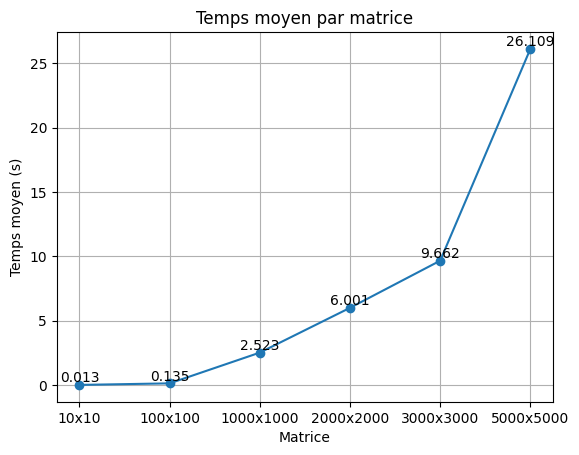
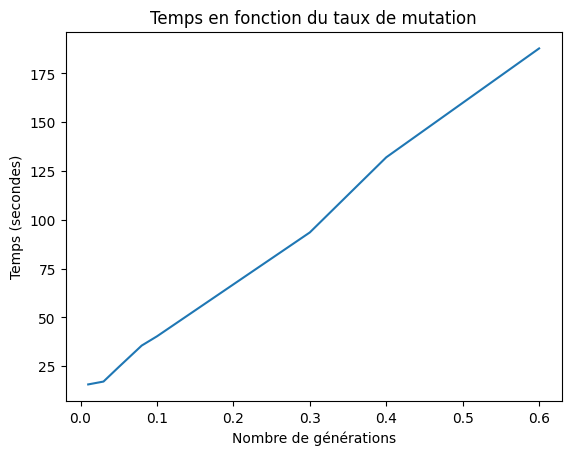 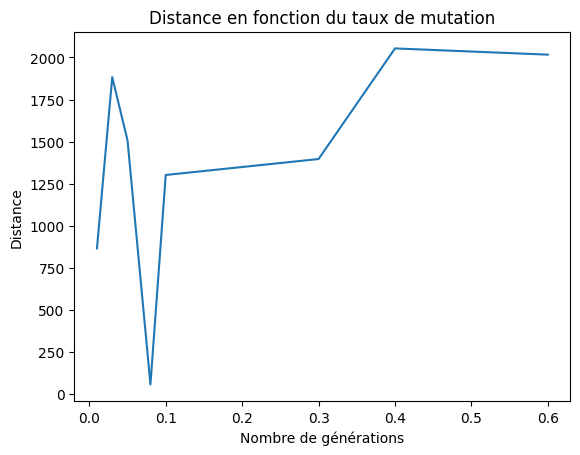 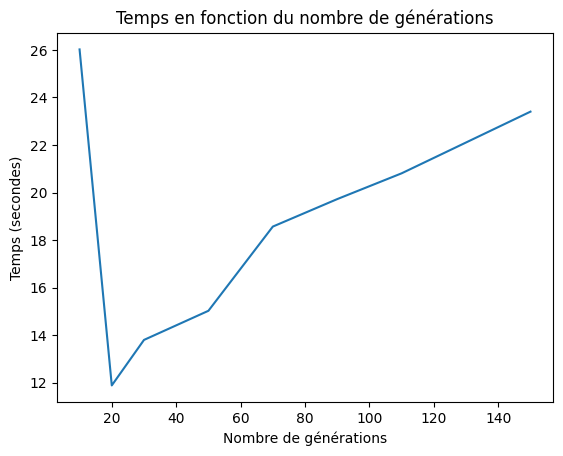 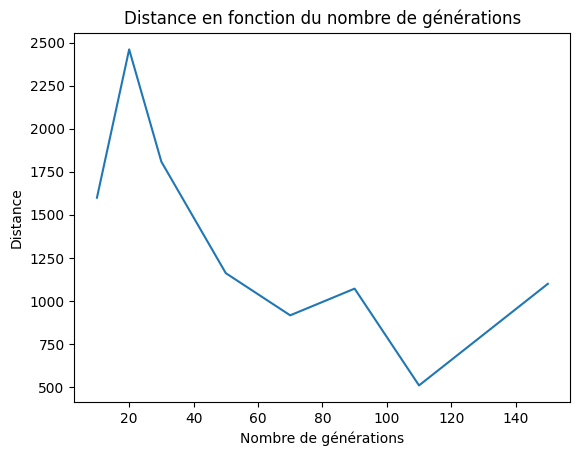 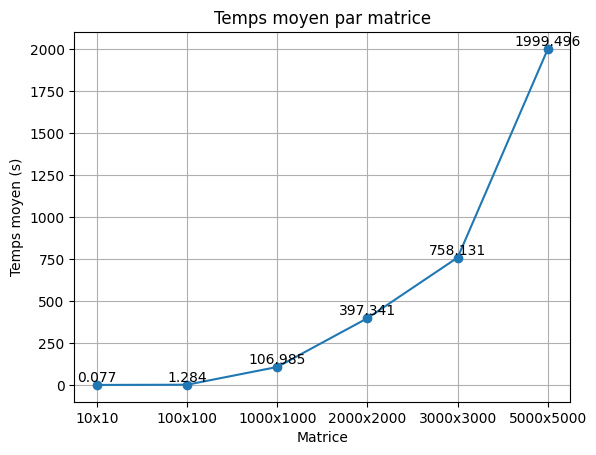 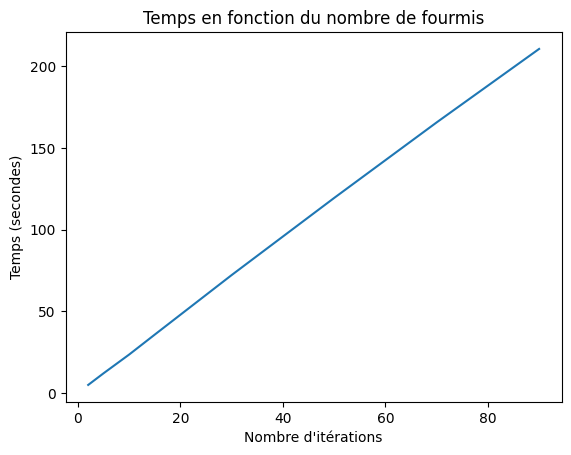 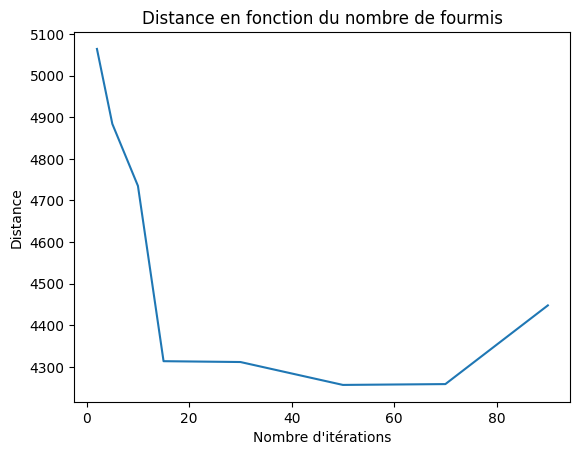 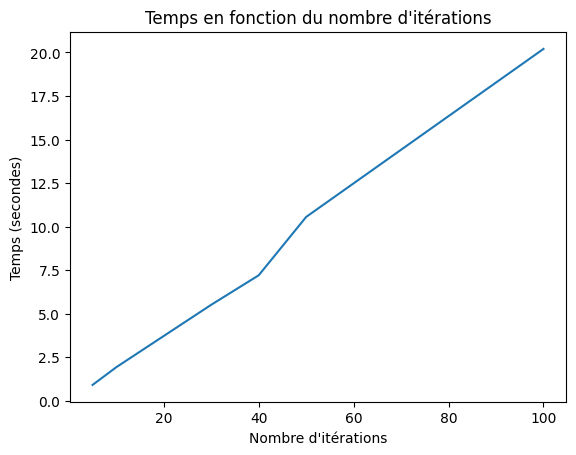 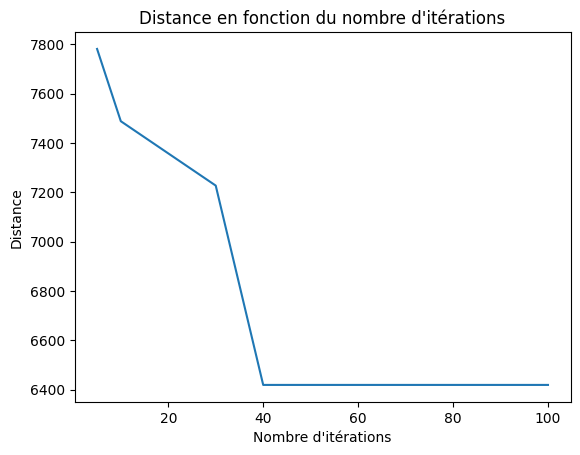